In [180]:
import requests as rq
from urllib.request import urlopen
import pandas as pd
from bs4 import BeautifulSoup

datarows = []

#GATHERING NAMES, PICK #, AND VORP FOR EVERY NON-LOTTERY PICK FROM THE 2010s
for i in range(2010,2020):
    url = ("https://www.basketball-reference.com/draft/NBA_%s.html" % i)
    html = urlopen(url)
    soup = BeautifulSoup(html, features = 'lxml')
    rows = soup.findAll('tr')[2:]
    rows_data = [[td.getText() for td in rows[i].findAll('td')]
                        for i in range(len(rows))]
    rows_data = rows_data[14:]
#print(rows_data)

    for data in rows_data:
        if len(data) > 3 and data[3] != '' and data[5] != '':
            picknumber = data[0]
            name = data[2]
            games = float(data[5])
            vorp = float(data[-1])
            VPG = vorp/games
            stats = [name,picknumber,games,vorp,VPG]
            #print(stats)
            datarows.append(stats)
        else:
            ()
print(datarows)

[['Larry Sanders', '15', 238.0, 1.1, 0.004621848739495798], ['Luke Babbitt', '16', 381.0, -0.1, -0.00026246719160104987], ['Eric Bledsoe', '18', 670.0, 18.3, 0.027313432835820897], ['Avery Bradley', '19', 581.0, -0.8, -0.001376936316695353], ['James Anderson', '20', 247.0, -0.8, -0.003238866396761134], ['Craig Brackins', '21', 17.0, -0.2, -0.011764705882352941], ['Elliot Williams', '22', 109.0, -1.1, -0.010091743119266056], ['Trevor Booker', '23', 532.0, 4.2, 0.007894736842105263], ['Damion James', '24', 39.0, -0.3, -0.007692307692307692], ['Dominique Jones', '25', 80.0, -0.1, -0.00125], ['Quincy Pondexter', '26', 355.0, 0.3, 0.0008450704225352112], ['Jordan Crawford', '27', 281.0, 1.3, 0.004626334519572954], ['Greivis Vásquez', '28', 401.0, 1.9, 0.004738154613466334], ['Daniel Orton', '29', 51.0, -0.2, -0.00392156862745098], ['Lazar Hayward', '30', 72.0, -0.3, -0.004166666666666667], ['Dexter Pittman', '32', 50.0, -0.5, -0.01], ['Hassan Whiteside', '33', 434.0, 13.3, 0.030645161290322

In [181]:
teens_sum = 0
teens_count = 0
low_twenties_sum = 0
low_twenties_count = 0
high_twenties_sum = 0
high_twenties_count = 0
low_thirties_sum = 0
low_thirties_count = 0
high_thirties_sum = 0
high_thirties_count = 0
low_forties_sum = 0
low_forties_count = 0
high_forties_sum = 0
high_forties_count = 0
low_fifties_sum = 0
low_fifties_count = 0
high_fifties_sum = 0
high_fifties_count = 0

#CREATING AVERAGES FOR VPM - VORP PER MINUTE - FOR RANGES OF PICKS
for item in datarows:
    if int(item[1]) >= 15 and int(item[1]) < 20:
        teens_sum += float(item[-1])
        teens_count += 1
    elif int(item[1]) >= 20 and int(item[1]) < 25:
        low_twenties_sum += float(item[-1])
        low_twenties_count += 1
    elif int(item[1]) >= 25 and int(item[1]) < 30:
        high_twenties_sum += float(item[-1])
        high_twenties_count += 1
    elif int(item[1]) >= 30 and int(item[1]) < 35:
        low_thirties_sum += float(item[-1])
        low_thirties_count += 1
    elif int(item[1]) >= 35 and int(item[1]) < 40:
        high_thirties_sum += float(item[-1])
        high_thirties_count += 1
    elif int(item[1]) >= 40 and int(item[1]) < 45:
        low_forties_sum += float(item[-1])
        low_forties_count += 1
    elif int(item[1]) >= 45 and int(item[1]) < 50:
        high_forties_sum += float(item[-1])
        high_forties_count += 1
    elif int(item[1]) >= 50 and int(item[1]) < 55:
        low_fifties_sum += float(item[-1])
        low_fifties_count += 1
    elif int(item[1]) >= 55:
        high_fifties_sum += float(item[-1])
        high_fifties_count += 1
             
teens_avg = teens_sum/teens_count
low_twenties_avg = low_twenties_sum/low_twenties_count
high_twenties_avg = high_twenties_sum/high_twenties_count
low_thirties_avg = low_thirties_sum/low_thirties_count
high_thirties_avg = high_thirties_sum/high_thirties_count
low_forties_avg = low_forties_sum/low_forties_count
high_forties_avg = high_forties_sum/high_forties_count
low_fifties_avg = low_fifties_sum/low_fifties_count
high_fifties_avg = high_fifties_sum/high_fifties_count

print(teens_avg)
print(low_twenties_avg)
print(high_twenties_avg)
print(low_thirties_avg)
print(high_thirties_avg)
print(low_forties_avg)
print(high_forties_avg)
print(low_fifties_avg)
print(high_fifties_avg)

0.004090680651055701
0.0029133211961943706
0.0009119278143848693
0.0012494777755700187
0.0005495696200309502
-0.0033869000072918477
-0.001518757806440536
-0.004848292564400842
-0.0036748156952046422


In [3]:
#CREATING A BINARY STATISTIC, 1 IF A PLAYER EXCEEDED AVERAGE VPM FOR A PICK IN THEIR RANGE, 0 IF NOT
for item in datarows:
    if int(item[1]) >= 15 and int(item[1]) < 20:
        if item[-1] > teens_avg:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 20 and int(item[1]) < 25:
        if item[-1] > low_twenties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 25 and int(item[1]) < 30:
        if item[-1] > high_twenties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 30 and int(item[1]) < 35:
        if item[-1] > low_thirties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 35 and int(item[1]) < 40:
        if item[-1] > high_thirties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 40 and int(item[1]) < 45:
        if item[-1] > low_forties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 45 and int(item[1]) < 50:
        if item[-1] > high_forties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 50 and int(item[1]) < 55:
        if item[-1] > low_fifties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)
    elif int(item[1]) >= 55:
        if item[-1] > high_fifties_avg and float(item[2]) > 15:
            item.append(1)
        else:
            item.append(0)

print(datarows)

[['Larry Sanders', '15', 238.0, 1.1, 0.004621848739495798, 1], ['Luke Babbitt', '16', 381.0, -0.1, -0.00026246719160104987, 0], ['Eric Bledsoe', '18', 670.0, 18.3, 0.027313432835820897, 1], ['Avery Bradley', '19', 581.0, -0.8, -0.001376936316695353, 0], ['James Anderson', '20', 247.0, -0.8, -0.003238866396761134, 0], ['Craig Brackins', '21', 17.0, -0.2, -0.011764705882352941, 0], ['Elliot Williams', '22', 109.0, -1.1, -0.010091743119266056, 0], ['Trevor Booker', '23', 532.0, 4.2, 0.007894736842105263, 1], ['Damion James', '24', 39.0, -0.3, -0.007692307692307692, 0], ['Dominique Jones', '25', 80.0, -0.1, -0.00125, 0], ['Quincy Pondexter', '26', 355.0, 0.3, 0.0008450704225352112, 0], ['Jordan Crawford', '27', 281.0, 1.3, 0.004626334519572954, 1], ['Greivis Vásquez', '28', 401.0, 1.9, 0.004738154613466334, 1], ['Daniel Orton', '29', 51.0, -0.2, -0.00392156862745098, 0], ['Lazar Hayward', '30', 72.0, -0.3, -0.004166666666666667, 0], ['Dexter Pittman', '32', 50.0, -0.5, -0.01, 0], ['Hassan 

In [4]:
headers = ["Name","Pick","Games Played","VORP", "VPG", "Overachiever?"]
dataframe = pd.DataFrame(datarows,columns = headers)
dataframe


,Name,Pick,Games Played,VORP,VPG,Overachiever?
0,Larry Sanders,15,238.0,1.1,0.004622,1
1,Luke Babbitt,16,381.0,-0.1,-0.000262,0
2,Eric Bledsoe,18,670.0,18.3,0.027313,1
3,Avery Bradley,19,581.0,-0.8,-0.001377,0
4,James Anderson,20,247.0,-0.8,-0.003239,0
...,...,...,...,...,...,...
328,Marial Shayok,54,4.0,-0.1,-0.025000,0
329,Kyle Guy,55,19.0,-0.1,-0.005263,0
330,Jordan Bone,57,24.0,-0.2,-0.008333,0
331,Miye Oni,58,37.0,-0.1,-0.002703,1


In [5]:
from urllib.request import Request, urlopen

#GATHERING NAMES OF ALL ACTIVE UNDRAFTED PLAYERS IN THE NBA
req = Request('https://www.2kratings.com/lists/undrafted-players', headers={'User-Agent': 'Mozilla/5.0'})
html2 = urlopen(req)
soup2 = BeautifulSoup(html2, features = 'lxml')
#print(soup2)
rows2 = soup2.findAll('tr')[1:]
rows_data2 = [[td.getText() for td in rows2[i].findAll('td')]
                        for i in range(len(rows2))]
print(rows_data2)

[['1.', '  Fred VanVleet    SG / PG | 6\'1"\n | TOR ', ' 85', ' 84', ' 35'], ['2.', '  Christian Wood    C / PF | 6\'10"\n | HOU ', ' 85', ' 83', ' 85'], ['3.', '  Chris Boucher    C / PF | 6\'9"\n | TOR ', ' 80', ' 85', ' 80'], ['4.', '  Joe Ingles    SF / PF | 6\'7"\n | UTA ', ' 80', ' 88', ' 45'], ['5.', '  Daniel Theis    PF / C | 6\'8"\n | BOS ', ' 78', ' 81', ' 78'], [''], ['6.', '  Naz Reid    C / PF | 6\'9"\n | MIN ', ' 78', ' 77', ' 75'], ['7.', '  T.J. McConnell    PG | 6\'1"\n | IND ', ' 78', ' 76', ' 25'], ['8.', '  Robert Covington    PF / SF | 6\'7"\n | POR ', ' 77', ' 77', ' 65'], ['9.', '  Kendrick Nunn    SG / PG | 6\'2"\n | MIA ', ' 77', ' 81', ' 75'], ['10.', '  David Nwaba    SF / PF | 6\'5"\n | HOU ', ' 77', ' 70', ' 75'], ['11.', '  JaMychal Green    PF / C | 6\'8"\n | DEN ', ' 77', ' 85', ' 70'], ['12.', '  Luguentz Dort    SF / SG | 6\'3"\n | OKC ', ' 76', ' 76', ' 85'], ['13.', '  Seth Curry    SG / PG | 6\'2"\n | PHI ', ' 76', ' 88', ' 36'], [''], ['14.', '  K

In [6]:
undrafted_player_names = []

#FORMATTING PLAYER NAMES INTO A USABLE FORMAT
for item in rows_data2:
    if len(item) > 1:
        index = item[1].find('  ',2)
        name = item[1][:index]
        name_list = name.split()
        undrafted_player_names.append(name_list)
    else:
        ()

for item in undrafted_player_names:
    print(item)

['Fred', 'VanVleet']
['Christian', 'Wood']
['Chris', 'Boucher']
['Joe', 'Ingles']
['Daniel', 'Theis']
['Naz', 'Reid']
['T.J.', 'McConnell']
['Robert', 'Covington']
['Kendrick', 'Nunn']
['David', 'Nwaba']
['JaMychal', 'Green']
['Luguentz', 'Dort']
['Seth', 'Curry']
['Khem', 'Birch']
['Royce', 'O’Neale']
['Kenrich', 'Williams']
['Derrick', 'Jones', 'Jr.']
['Langston', 'Galloway']
['Kent', 'Bazemore']
['Duncan', 'Robinson']
['J.J.', 'Barea']
['Aron', 'Baynes']
['Bryn', 'Forbes']
['Allonzo', 'Trier']
['Terence', 'Davis']
['Maxi', 'Kleber']
['Jeremy', 'Lin']
['Damion', 'Lee']
['Juan', 'Toscano']
['P.J.', 'Dozier']
['Justin', 'Holiday']
['Boban', 'Marjanovic']
['Torrey', 'Craig']
['Garrison', 'Mathews']
['Nicolo', 'Melli']
['Alex', 'Caruso']
['John', 'Konchar']
['Caleb', 'Martin']
['Wesley', 'Matthews']
['Danuel', 'House']
['Quinn', 'Cook']
['Ish', 'Smith']
['Dorian', 'Finney-Smith']
['Jordan', 'McLaughlin']
['Garrett', 'Temple']
['Luke', 'Kornet']
['Matt', 'Thomas']
['Chris', 'Clemons']
['J

In [7]:
undrafted_overachievers = []

#KEYING INTO UNDRAFTED PLAYERS PRO PAGES AND ADDING THEM TO A LIST OF OVERACHIEVERS IF THEY HAVE PLAYED MORE THAN 82 GAMES
for player in undrafted_player_names:
    player[0] = player[0].replace(".","")
    player[1] = player[1].replace("’","")
    player[0] = player[0].replace("JJ","jo")
    if len(player[1]) > 4:
        namestring = (player[1][:5]) + (player[0][:2])
    else:
        namestring = (player[1]) + (player[0][:2])
    namestring = namestring.lower()
    initial = namestring[0]
    if namestring.startswith("daviste") == True or namestring.startswith("jonesde") == True or namestring.startswith("thomama") or namestring.startswith("reavejo") == True or namestring.startswith("martica") == True or namestring.startswith("sampsja") == True or namestring.startswith("greenja") == True or namestring.startswith("paytoga") == True or namestring.startswith("brownch") == True or namestring.startswith("martije") == True or namestring.startswith("kinglo") == True:
        number = "02"
    else:
        number = "01"
    if namestring.startswith("klebema") == True:
        namestring = 'klebima'
    if namestring.startswith("willike") == True or namestring.startswith("willijo") == True:
        number = "04"
    if namestring.startswith("leeda") == True or namestring.startswith("martike") == True:
        number = "03"
    url3 = ("https://www.basketball-reference.com/players/%s/%s%s.html" % (initial,namestring,number))
    #print(url3)
    html3 = urlopen(url3)
    soup3 = BeautifulSoup(html3, features = 'lxml')
    name = soup3.find('h1').getText()
    name = name.strip()
    print(name)
    totals = soup3.findAll("td",{"class": "right","data-stat":"g"})
    gamelist =[]

    for item in totals:
        if item.text != '':
            gamelist.append(int(item.text))
    gamelist = sorted(gamelist)
    if len(gamelist) > 0:
        if gamelist[-1] > 82:
            undrafted_overachievers.append([name,1])
    
print(undrafted_overachievers)

Fred VanVleet
Christian Wood
Chris Boucher
Joe Ingles
Daniel Theis
Naz Reid
T.J. McConnell
Robert Covington
Kendrick Nunn
David Nwaba
Javonte Green
Luguentz Dort
Seth Curry
Khem Birch
Royce O'Neale
Kenrich Williams
Derrick Jones Jr.
Langston Galloway
Kent Bazemore
Duncan Robinson
J.J. Barea
Aron Baynes
Bryn Forbes
Allonzo Trier
Terence Davis
Maxi Kleber
Jeremy Lin
Damion Lee
Juan Toscano-Anderson
PJ Dozier
Justin Holiday
Boban Marjanović
Torrey Craig
Garrison Mathews
Nicolò Melli
Alex Caruso
John Konchar
Caleb Martin
Wes Matthews
Danuel House
Quinn Cook
Ish Smith
Dorian Finney-Smith
Jordan McLaughlin
Garrett Temple
Luke Kornet
Matt Thomas
Chris Clemons
JaKarr Sampson
Shaquille Harrison
Javonte Green
Vincent Poirier
Tim Frazier
Tyler Johnson
Dewayne Dedmon
Chris Chiozza
Chris Silva
Ryan Arcidiacono
Brad Wanamaker
Cristiano Felício
Max Strus
Yuta Watanabe
Mychal Mulder
Gary Payton II
Ky Bowman
Gary Clark
Anthony Tolliver
Yogi Ferrell
Rodney McGruder
DaQuan Jeffries
Johnathan Motley
Troy 

In [8]:
print(len(undrafted_overachievers))
safe = undrafted_overachievers
print(undrafted_overachievers[3])

#REMOVING INTERNATIONAL PLAYERS
undrafted_overachievers.pop(3)
undrafted_overachievers.pop(3)
undrafted_overachievers.pop(20)
undrafted_overachievers.pop(23)
undrafted_overachievers.pop(39)
undrafted_overachievers.pop(39)
print(undrafted_overachievers)


55
['Joe Ingles', 1]
[['Fred VanVleet', 1], ['Christian Wood', 1], ['Chris Boucher', 1], ['T.J. McConnell', 1], ['Robert Covington', 1], ['Kendrick Nunn', 1], ['David Nwaba', 1], ['Seth Curry', 1], ['Khem Birch', 1], ["Royce O'Neale", 1], ['Kenrich Williams', 1], ['Derrick Jones Jr.', 1], ['Langston Galloway', 1], ['Kent Bazemore', 1], ['Duncan Robinson', 1], ['J.J. Barea', 1], ['Aron Baynes', 1], ['Bryn Forbes', 1], ['Allonzo Trier', 1], ['Terence Davis', 1], ['Jeremy Lin', 1], ['Damion Lee', 1], ['Justin Holiday', 1], ['Torrey Craig', 1], ['Alex Caruso', 1], ['Wes Matthews', 1], ['Danuel House', 1], ['Quinn Cook', 1], ['Ish Smith', 1], ['Dorian Finney-Smith', 1], ['Garrett Temple', 1], ['Luke Kornet', 1], ['JaKarr Sampson', 1], ['Shaquille Harrison', 1], ['Tim Frazier', 1], ['Tyler Johnson', 1], ['Dewayne Dedmon', 1], ['Ryan Arcidiacono', 1], ['Brad Wanamaker', 1], ['Anthony Tolliver', 1], ['Yogi Ferrell', 1], ['Rodney McGruder', 1], ['Troy Daniels', 1], ['Chasson Randle', 1], ['Trev

#### 

In [9]:
#ADDING UNDRAFTED PLAYERS TO THE MAIN DATAFRAME
for index,item in dataframe.iterrows():
    name = item[0]
    overachiever = item[-1]
    undrafted_overachievers.append([name,overachiever])

print(len(undrafted_overachievers))
print(undrafted_overachievers)

382
[['Fred VanVleet', 1], ['Christian Wood', 1], ['Chris Boucher', 1], ['T.J. McConnell', 1], ['Robert Covington', 1], ['Kendrick Nunn', 1], ['David Nwaba', 1], ['Seth Curry', 1], ['Khem Birch', 1], ["Royce O'Neale", 1], ['Kenrich Williams', 1], ['Derrick Jones Jr.', 1], ['Langston Galloway', 1], ['Kent Bazemore', 1], ['Duncan Robinson', 1], ['J.J. Barea', 1], ['Aron Baynes', 1], ['Bryn Forbes', 1], ['Allonzo Trier', 1], ['Terence Davis', 1], ['Jeremy Lin', 1], ['Damion Lee', 1], ['Justin Holiday', 1], ['Torrey Craig', 1], ['Alex Caruso', 1], ['Wes Matthews', 1], ['Danuel House', 1], ['Quinn Cook', 1], ['Ish Smith', 1], ['Dorian Finney-Smith', 1], ['Garrett Temple', 1], ['Luke Kornet', 1], ['JaKarr Sampson', 1], ['Shaquille Harrison', 1], ['Tim Frazier', 1], ['Tyler Johnson', 1], ['Dewayne Dedmon', 1], ['Ryan Arcidiacono', 1], ['Brad Wanamaker', 1], ['Anthony Tolliver', 1], ['Yogi Ferrell', 1], ['Rodney McGruder', 1], ['Troy Daniels', 1], ['Chasson Randle', 1], ['Treveon Graham', 1], 

In [10]:
targetarray = undrafted_overachievers

In [11]:
#REMOVING A PLAYER WHO WENT TO A US COLLEGE BUT WAS INELIGIBLE FOR COMPETITION
targetarray.pop(173)

['Ricky Ledo', 0]

In [12]:
columns = ['Name','Overachiever?']
target_array = pd.DataFrame(targetarray,columns=columns)
with pd.option_context('display.max_rows', None, 'display.max_columns', None): 
    print(target_array)

                         Name  Overachiever?
0               Fred VanVleet              1
1              Christian Wood              1
2               Chris Boucher              1
3              T.J. McConnell              1
4            Robert Covington              1
5               Kendrick Nunn              1
6                 David Nwaba              1
7                  Seth Curry              1
8                  Khem Birch              1
9               Royce O'Neale              1
10           Kenrich Williams              1
11          Derrick Jones Jr.              1
12          Langston Galloway              1
13              Kent Bazemore              1
14            Duncan Robinson              1
15                 J.J. Barea              1
16                Aron Baynes              1
17                Bryn Forbes              1
18              Allonzo Trier              1
19              Terence Davis              1
20                 Jeremy Lin              1
21        

In [13]:
positions = []
collegeurl = []
for player, number in targetarray:
    
    #CONVERTING NAMES INTO USABLE URL FORMATS AND HANDLING PROBLEMATIC CASES
    player = player.lower()
    if player[-5:] == 'vleet':
        player = 'fred van vleet'
    player = player.replace(" ","-")
    player = player.replace(".","")
    player = player.replace("'","")
    player = player.replace("á","a")
    if player.startswith("derrick-jones") or player.startswith("gary-trent") or player.startswith("kevin-porter"):
        player = player.replace("-jr","jr")
    if player.startswith("kz"):
        player = player.replace("kz","kezie")
    player = player.replace("č","c")
    player = player.replace("ć","c")
    player = player.replace("-iii","")
    player = player.replace("è","e")
    player = player.replace("yogi-","kevin-")
    if player.startswith("jj-barea"):
        player = player.replace("jj","jose")
    if player.startswith("ish-"):
        player = player.replace("ish","ishmael")
    if player.startswith("devyn-marble"):
        player = player.replace("devyn","roy-devyn")
    if player.startswith("wes-matthews"):
        player = player.replace("wes","wesley")
    if player.startswith("jeff-taylor"):
        player = player.replace("jeff","jeffery")
    if player.startswith("joe-young"):
        player = player.replace("joe","joseph")
    if player.startswith("stephen-zimmerman"):
        player = player.replace("zimmerman","zimmermanjr")
    if player.startswith("kay-felder"):
        player = player.replace("kay","kahlil")
    if player.startswith("troy-brown-jr"):
        player = player.replace("-jr","")
    if player.startswith("kelly-oubre") or player.startswith("larry-nance"):
        player = player.replace("-jr","")
    if player.startswith("shake-milton"):
        player = player.replace("shake","malik")
    if player.startswith("ray-spalding"):
        player = player.replace("ray","raymond")
    if player.startswith("dewan-hernandez"):
        player = player.replace("hernandez","huell")
    if player.startswith("larry-nance") or player.startswith("glenn-robinson") or player.startswith("lonnie-walker") or player.startswith("tyler-johnson") or player.startswith("ray-mccallum") or player.startswith("reggie-bullock") or player.startswith("josh-richardson") or player.startswith("demetrius-jackson") or player.startswith("frank-jackson") or player.startswith("sterling-brown") or player.startswith("vince-edwards") or player.startswith("justin-james"):
        urlnumber = '2'
    elif player.startswith("bernard-james"):
        urlnumber = '-1'
    elif player.startswith("kyle-anderson") or player.startswith("ryan-kelly"):
        urlnumber = '3'
    elif player.startswith("mike-scott") or player.startswith("tony-mitchell") or player.startswith("justin-jackson"):
        urlnumber = '4'
    elif player.startswith("troy-brown"):
        urlnumber = '5'
    else:
        urlnumber = '1'
        
    #ADDING PLAYERS UNIQUE URL TO A LIST FOR FURTHER USE
    playerurl = ("%s-%s" % (player,urlnumber))
    collegeurl.append(playerurl)
    print(player)
    url4 = ("https://www.sports-reference.com/cbb/players/%s-%s.html" % (player,urlnumber))
    html4 = urlopen(url4)
    soup4 = BeautifulSoup(html4, features = 'lxml')
    
    #GRABBING PLAYERS POSITION BECAUSE IT'S EASY
    if player != "dewan-huell":
        position = soup4.find('p').getText()
    #print(url4)
        positions.append(position.split()[-1])
    else:
        position = soup4.findAll('p')
        position = position[1].getText().split()[-1]
        positions.append(position)

print(collegeurl)

fred-van-vleet
christian-wood
chris-boucher
tj-mcconnell
robert-covington
kendrick-nunn
david-nwaba
seth-curry
khem-birch
royce-oneale
kenrich-williams
derrick-jonesjr
langston-galloway
kent-bazemore
duncan-robinson
jose-barea
aron-baynes
bryn-forbes
allonzo-trier
terence-davis
jeremy-lin
damion-lee
justin-holiday
torrey-craig
alex-caruso
wesley-matthews
danuel-house
quinn-cook
ishmael-smith
dorian-finney-smith
garrett-temple
luke-kornet
jakarr-sampson
shaquille-harrison
tim-frazier
tyler-johnson
dewayne-dedmon
ryan-arcidiacono
brad-wanamaker
anthony-tolliver
kevin-ferrell
rodney-mcgruder
troy-daniels
chasson-randle
treveon-graham
udonis-haslem
matthew-dellavedova
alfonzo-mckinnie
jeremy-pargo
larry-sanders
luke-babbitt
eric-bledsoe
avery-bradley
james-anderson
craig-brackins
elliot-williams
trevor-booker
damion-james
dominique-jones
quincy-pondexter
jordan-crawford
greivis-vasquez
daniel-orton
lazar-hayward
dexter-pittman
hassan-whiteside
armon-johnson
darington-hobson
andy-rautins
la

In [14]:
from time import sleep
import numpy as np
import math

collegestats = []

for index, player in enumerate(collegeurl):
    print(player)
    url5 = ("https://www.sports-reference.com/cbb/players/%s.html" % player)
    html5 = rq.get(url5).text
    soup5 = BeautifulSoup(html5, 'html.parser')
    per100 = pd.DataFrame()
    advanced = pd.DataFrame()
    placeholders = soup5.find_all('div', {'class': 'placeholder'})
    transfer = soup5.find('td', {'class': 'left', 'data-stat': 'notes'})
    if transfer != None:
        careerfinder = 3
    else:
        careerfinder = 1

    for x in placeholders:
            # Get elements after placeholder and combine into one string
        comment = ''.join(x.next_siblings)
            # Parse comment back into soup object
        soup_comment = BeautifulSoup(comment, 'html.parser')
            # Extract correct table from soup object using 'id' attribute
        possession_tables = soup_comment.find_all('table', attrs={"id":"players_per_min"})
            
        advanced_tables = soup_comment.find_all('table', attrs={"id":"players_advanced"})
    
        for tag in possession_tables:
        #print(tag)
                # Turn table from html to pandas DataFrame
            df = pd.read_html(tag.prettify())[0]
                # Extract a player's stats from their most recent college season
            table = df.iloc[-careerfinder, :]
                # Add individual player stats to full per_poss DataFrame
            per100 = per100.append(table).reset_index()
                # Filter out irrelevant columns
            per100 = per100[['Season', 'School', 'Conf', 'G', 'GS', 'MP',
                'FG', 'FGA', 'FG%', '2P', '2PA', '2P%', '3P', '3PA', '3P%', 'FT',
                'FTA', 'FT%', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']]
        
        for tag in advanced_tables:
        #print(tag)
                # Turn table from html to pandas DataFrame
            df = pd.read_html(tag.prettify())[0]
                # Extract a player's stats from their most recent college season
            table = df.iloc[-careerfinder, :]
                # Add individual player stats to full per_poss DataFrame
            advanced = advanced.append(table).reset_index()
                # Filter out irrelevant columns
            advanced = advanced[['Season', 'School', 'Conf', 'G', 'GS', 'MP', 'TS%', 'eFG%', '3PAr', 'FTr', 'PProd', 'ORB%', 'DRB%', 'TRB%', 'AST%',
                'STL%', 'BLK%', 'TOV%', 'USG%', 'OWS', 'DWS', 'WS', 'WS/40']]
        
        
        
#LIST OF INDIVIDUAL PLAYER'S COLLEGE STATS
    playerstats = []
#ADDING POSITION
    playerstats.append(positions[index])

#SELECTING PER100 POSSESSIONS STATS FOR THE DATAFRAME
    minutesplayed = per100.iloc[0]['MP']
    playerstats.append(minutesplayed)
    FGA = per100.iloc[0]['FGA']
    playerstats.append(FGA)
    FGpercent = per100.iloc[0]['FG%']
    playerstats.append(FGpercent)
    THREEPA = per100.iloc[0]['3PA']
    playerstats.append(THREEPA)
    THREEPERCENT = per100.iloc[0]['3P%']
    if math.isnan(THREEPERCENT):
        THREEPERCENT = 0
    playerstats.append(THREEPERCENT)
    FTA = per100.iloc[0]['FTA']
    playerstats.append(FTA)
    FTPERCENT = per100.iloc[0]['FT%']
    playerstats.append(FTPERCENT)
    REB = per100.iloc[0]['TRB']
    playerstats.append(REB)
    AST = per100.iloc[0]['AST']
    playerstats.append(AST)
    STL = per100.iloc[0]['STL']
    playerstats.append(STL)
    BLK = per100.iloc[0]['BLK']
    playerstats.append(BLK)
    TOV = per100.iloc[0]['TOV']
    playerstats.append(TOV)
    PF = per100.iloc[0]['PF']
    playerstats.append(PF)
    PTS = per100.iloc[0]['PTS']
    playerstats.append(PTS)
    #ORtg = per100.iloc[0]['ORtg']
    #playerstats.append(ORtg)
    #DRtg = per100.iloc[0]['DRtg']
    #playerstats.append(DRtg)

    #SELECTING ADVANCED STATS FOR THE DATAFRAME
    TS = advanced.iloc[0]['TS%']
    playerstats.append(TS)
    eFG = advanced.iloc[0]['eFG%']
    playerstats.append(eFG)
    THREEPAr = advanced.iloc[0]['3PAr']
    playerstats.append(THREEPAr)
    FTr = advanced.iloc[0]['FTr']
    playerstats.append(FTr)
    #PProd = advanced.iloc[0]['PProd']
    #playerstats.append(PProd)
    #ORB = advanced.iloc[0]['ORB%']
    #playerstats.append(ORB)
    #DRB = advanced.iloc[0]['DRB%']
    #playerstats.append(DRB)
    USG = advanced.iloc[0]['USG%']
    playerstats.append(USG)
    OWS = advanced.iloc[0]['OWS']
    playerstats.append(OWS)
    DWS = advanced.iloc[0]['DWS']
    playerstats.append(DWS)
    WS = advanced.iloc[0]['WS']
    playerstats.append(WS)
    WSPER40 = advanced.iloc[0]['WS/40']
    playerstats.append(WSPER40)
    #OBPM = advanced.iloc[0]['OBPM']
    #playerstats.append(OBPM)
    #DBPM = advanced.iloc[0]['DBPM']
    #playerstats.append(DBPM)
    #BPM = advanced.iloc[0]['BPM']
    #playerstats.append(BPM)
    
    #ADDING TEAM STRENGTH OF SCHEDULE STAT
    SOSs = soup5.findAll("td",{"class":"right","data-stat":"sos"})
    soslist = []
    for item in SOSs:
        if item.text != '':
            soslist.append(item.text)
    playerstats.append(soslist[-1])
    
    #GATHERING TEAM RECORD STAT - WINS FIRST
    winurl = ("https://www.sports-reference.com/cbb/players/%s/splits?game_result=W" % player)
    winhtml = urlopen(winurl)
    winsoup = BeautifulSoup(winhtml,'html.parser')
    wins = int(winsoup.find("td",{"class":"right","data-stat":"g"}).text)
    #sleep(1)
    #NOW LOSSES
    lossurl = ("https://www.sports-reference.com/cbb/players/%s/splits?game_result=L" % player)
    losshtml = urlopen(lossurl)
    losssoup = BeautifulSoup(losshtml,'html.parser')
    losses = int(losssoup.find("td",{"class":"right","data-stat":"g"}).text)
    #WIN PERCENTAGE
    win_percentage = (wins)/(wins+losses)
    playerstats.append(win_percentage)
    
    #ADDING INDIVIDUAL STATS TO THE MAIN DATAFRAME
    collegestats.append(playerstats)
    #sleep(1)

print(collegestats)

fred-van-vleet-1
christian-wood-1
chris-boucher-1
tj-mcconnell-1
robert-covington-1
kendrick-nunn-1
david-nwaba-1
seth-curry-1
khem-birch-1
royce-oneale-1
kenrich-williams-1
derrick-jonesjr-1
langston-galloway-1
kent-bazemore-1
duncan-robinson-1
jose-barea-1
aron-baynes-1
bryn-forbes-1
allonzo-trier-1
terence-davis-1
jeremy-lin-1
damion-lee-1
justin-holiday-1
torrey-craig-1
alex-caruso-1
wesley-matthews-1
danuel-house-1
quinn-cook-1
ishmael-smith-1
dorian-finney-smith-1
garrett-temple-1
luke-kornet-1
jakarr-sampson-1
shaquille-harrison-1
tim-frazier-1
tyler-johnson-2
dewayne-dedmon-1
ryan-arcidiacono-1
brad-wanamaker-1
anthony-tolliver-1
kevin-ferrell-1
rodney-mcgruder-1
troy-daniels-1
chasson-randle-1
treveon-graham-1
udonis-haslem-1
matthew-dellavedova-1
alfonzo-mckinnie-1
jeremy-pargo-1
larry-sanders-1
luke-babbitt-1
eric-bledsoe-1
avery-bradley-1
james-anderson-1
craig-brackins-1
elliot-williams-1
trevor-booker-1
damion-james-1
dominique-jones-1
quincy-pondexter-1
jordan-crawford-1

In [15]:
#ASSIGNING THE AVERAGE OF THE USAGE STAT TO ONE PLAYER WHO DIDNT HAVE THAT STAT RECORDED DURING COLLEGE
usage = []
for item in collegestats:
    usage.append(item[-7])

usage.pop(45)
#print(usage)
usagesum = 0
for item in usage:
    usagesum += float(item)
    
avgusage = usagesum/len(usage)
print(avgusage)
collegestats[45][-7] = avgusage

22.881578947368418


Recall Baseline: 1.0 Test: 0.36 Train: 1.0
Precision Baseline: 0.47 Test: 0.54 Train: 1.0
Roc Baseline: 0.5 Test: 0.55 Train: 1.0


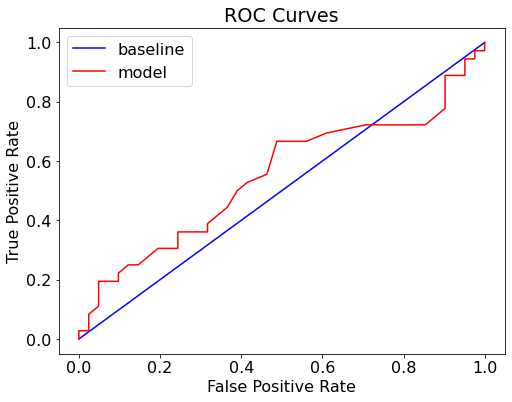

In [199]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score


#CREATING DATAFRAME AND TARGET LABELS
df_columns = ["Position","Total Minutes", "FGA", "FG%", "3PA","3P%","FTA","FT%","TRB","AST","STL","BLK","TOV","PF","PTS","TS%","eFG%","3PAr","FTr","USG%","OWS",'DWS','WS','WS/40','SOS','WIN%']
dataframe = pd.DataFrame(collegestats,columns = df_columns)
dataframe.pop('Position')
dataframe.pop('WS')
#dataframe.pop('WS/40')
#dataframe.pop('eFG%')
#dataframe = pd.get_dummies(dataframe, prefix = 'position', columns = ['Position'])
#print(dataframe)
target = target_array['Overachiever?']
precision_total_weight = 0
minutes_importances = []
fga_importances = []
fgpercent_importances = []
threepa_importances = []
threepercent_importances = []
fta_importances = []
ftpercent_importances = []
reb_importances = []
ast_importances = []
stl_importances = []
blk_importances = []
tov_importances = []
pf_importances = []
pts_importances = []
ts_importances = []
efg_importances = []
threePAr_importances = []
ftr_importances = []
usg_importances = []
ows_importances = []
dws_importances = []
ws_importances = []
ws40_importances = []
sos_importances = []
winpercent_importances = []

#TRAINING AND TESTING RANDOM FOREST CLASSIFIER ON DIFFERENT PARTS OF THE DATA AND SAVING FEATURE IMPORTANCE
for i in range(1):
    train, test, train_labels, test_labels = train_test_split(dataframe, target, stratify = target, test_size = 0.2)
    model = RandomForestClassifier(n_estimators=100, bootstrap = True, max_features = 'auto')
    model.fit(train, train_labels)
    train_predictions = model.predict(train)
    train_probs = model.predict_proba(train)[:, 1]
    rf_predictions = model.predict(test)
    rf_probs = model.predict_proba(test)[:, 1]
    precisionscore = precision_score(test_labels,rf_predictions)
    precision_total_weight += precisionscore
    minutes_importances.append(model.feature_importances_[0] * precisionscore)
    fga_importances.append(model.feature_importances_[1] * precisionscore)
    fgpercent_importances.append(model.feature_importances_[2] * precisionscore)
    threepa_importances.append(model.feature_importances_[3] * precisionscore)
    threepercent_importances.append(model.feature_importances_[4] * precisionscore)
    fta_importances.append(model.feature_importances_[5] * precisionscore)
    ftpercent_importances.append(model.feature_importances_[6] * precisionscore)
    reb_importances.append(model.feature_importances_[7] * precisionscore)
    ast_importances.append(model.feature_importances_[8] * precisionscore)
    stl_importances.append(model.feature_importances_[9] * precisionscore)
    blk_importances.append(model.feature_importances_[10] * precisionscore)
    tov_importances.append(model.feature_importances_[11] * precisionscore)
    pf_importances.append(model.feature_importances_[12] * precisionscore)
    pts_importances.append(model.feature_importances_[13] * precisionscore)
    ts_importances.append(model.feature_importances_[14] * precisionscore)
    efg_importances.append(model.feature_importances_[15] * precisionscore)
    threePAr_importances.append(model.feature_importances_[16] * precisionscore)
    ftr_importances.append(model.feature_importances_[17] * precisionscore)
    usg_importances.append(model.feature_importances_[18] * precisionscore)
    ows_importances.append(model.feature_importances_[19] * precisionscore)
    dws_importances.append(model.feature_importances_[20] * precisionscore)
    #ws_importances.append(model.feature_importances_[21] * precisionscore)
    ws40_importances.append(model.feature_importances_[21] * precisionscore)
    sos_importances.append(model.feature_importances_[22] * precisionscore)
    winpercent_importances.append(model.feature_importances_[23] * precisionscore)

evaluate_model(rf_predictions,rf_probs, train_predictions, train_probs)

In [200]:
from scipy.stats import zscore

importances = []
#CREATING A DATAFRAME WITH RELATIVE IMPORTANCE OF THE FEATURES TO THE MODELS, WEIGHTED BY THE PRECISION OF THE MODELS
avg_min_importance = sum(minutes_importances)/precision_total_weight
importances.append(avg_min_importance)
avg_fga_importance = sum(fga_importances)/precision_total_weight
importances.append(avg_fga_importance)
avg_fgpercent_importance = sum(fgpercent_importances)/precision_total_weight
importances.append(avg_fgpercent_importance)
avg_threepa_importance = sum(threepa_importances)/precision_total_weight
importances.append(avg_threepa_importance)
avg_threepercent_importance = sum(threepercent_importances)/precision_total_weight
importances.append(avg_threepercent_importance)
avg_fta_importance = sum(fta_importances)/precision_total_weight
importances.append(avg_fta_importance)
avg_ftpercent_importance = sum(ftpercent_importances)/precision_total_weight
importances.append(avg_ftpercent_importance)
avg_reb_importance = sum(reb_importances)/precision_total_weight
importances.append(avg_reb_importance)
avg_ast_importance = sum(ast_importances)/precision_total_weight
importances.append(avg_ast_importance)
avg_stl_importance = sum(stl_importances)/precision_total_weight
importances.append(avg_stl_importance)
avg_blk_importance = sum(blk_importances)/precision_total_weight
importances.append(avg_blk_importance)
avg_tov_importance = sum(tov_importances)/precision_total_weight
importances.append(avg_tov_importance)
avg_pf_importance = sum(pf_importances)/precision_total_weight
importances.append(avg_pf_importance)
avg_pts_importance = sum(pts_importances)/precision_total_weight
importances.append(avg_pts_importance)
avg_ts_importance = sum(ts_importances)/precision_total_weight
importances.append(avg_ts_importance)
avg_efg_importance = sum(efg_importances)/precision_total_weight
importances.append(avg_efg_importance)
avg_threePAr_importance = sum(threePAr_importances)/precision_total_weight
importances.append(avg_threePAr_importance)
avg_ftr_importance = sum(ftr_importances)/precision_total_weight
importances.append(avg_ftr_importance)
avg_usg_importance = sum(usg_importances)/precision_total_weight
importances.append(avg_usg_importance)
avg_ows_importance = sum(ows_importances)/precision_total_weight
importances.append(avg_ows_importance)
avg_dws_importance = sum(dws_importances)/precision_total_weight
importances.append(avg_dws_importance)
#avg_ws_importance = sum(ws_importances)/precision_total_weight
#importances.append(avg_ws_importance)
avg_ws40_importance = sum(ws40_importances)/precision_total_weight
importances.append(avg_ws40_importance)
avg_sos_importance = sum(sos_importances)/precision_total_weight
importances.append(avg_sos_importance)
avg_winpercent_importance = sum(winpercent_importances)/precision_total_weight
importances.append(avg_winpercent_importance)

labeled_importances = []
for idx, item in enumerate(importances):
    labeled_importance = [train.columns[idx],item]
    labeled_importances.append(labeled_importance)
    
feature_importance_df = pd.DataFrame(labeled_importances, columns = ['Feature','Scaled Importance'])
feature_importance_df['Scaled Importance'] = zscore(feature_importance_df['Scaled Importance'])
feature_importance_df = feature_importance_df.sort_values(by=['Scaled Importance'], ascending=False)
print(feature_importance_df)
avg_precision = (precision_total_weight/100)
print("The average precision of the 100 models was 56.55% compared to a baseline precision of 47.77%")

          Feature  Scaled Importance
20            DWS           3.034181
0   Total Minutes           1.377152
21          WS/40           1.166846
18           USG%           1.150614
22            SOS           1.040190
1             FGA           0.652587
13            PTS           0.373458
11            TOV           0.226982
23           WIN%           0.214705
8             AST           0.040797
6             FT%          -0.008955
7             TRB          -0.026465
17            FTr          -0.235657
12             PF          -0.346055
19            OWS          -0.501281
9             STL          -0.528751
5             FTA          -0.537619
2             FG%          -0.614457
15           eFG%          -0.846648
4             3P%          -1.054280
16           3PAr          -1.059512
14            TS%          -1.094966
3             3PA          -1.153838
10            BLK          -1.269030
The average precision of the 100 models was 56.55% compared to a baseline p

In [201]:
from sklearn.metrics import precision_score, recall_score, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

def evaluate_model(predictions, probs, train_predictions, train_probs):
    """Compare machine learning model to baseline performance.
    Computes statistics and shows ROC curve."""
    
    baseline = {}
    
    baseline['recall'] = recall_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['precision'] = precision_score(test_labels, [1 for _ in range(len(test_labels))])
    baseline['roc'] = 0.5
    
    results = {}
    
    results['recall'] = recall_score(test_labels, predictions)
    results['precision'] = precision_score(test_labels, predictions)
    results['roc'] = roc_auc_score(test_labels, probs)
    
    train_results = {}
    train_results['recall'] = recall_score(train_labels, train_predictions)
    train_results['precision'] = precision_score(train_labels, train_predictions)
    train_results['roc'] = roc_auc_score(train_labels, train_probs)
    
    for metric in ['recall', 'precision', 'roc']:
        print(f'{metric.capitalize()} Baseline: {round(baseline[metric], 2)} Test: {round(results[metric], 2)} Train: {round(train_results[metric], 2)}')
    
    # Calculate false positive rates and true positive rates
    base_fpr, base_tpr, _ = roc_curve(test_labels, [1 for _ in range(len(test_labels))])
    model_fpr, model_tpr, _ = roc_curve(test_labels, probs)

    plt.figure(figsize = (8, 6))
    plt.rcParams['font.size'] = 16
    
    # Plot both curves
    plt.plot(base_fpr, base_tpr, 'b', label = 'baseline')
    plt.plot(model_fpr, model_tpr, 'r', label = 'model')
    plt.legend();
    plt.xlabel('False Positive Rate'); plt.ylabel('True Positive Rate'); plt.title('ROC Curves');

In [192]:
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    Source: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.figure(figsize = (10, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, size = 24)
    plt.colorbar(aspect=4)
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, size = 0)
    plt.yticks(tick_marks, classes, size = 0)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    # Labeling the plot
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), fontsize = 20,
                 horizontalalignment="center",
                 color="black" if cm[i, j] > thresh else "black")
        
    plt.grid(None)
    plt.tight_layout()
    plt.ylabel('True label', size = 18)
    plt.xlabel('Predicted label', size = 18)
    


Confusion matrix, without normalization
[[27 14]
 [23 13]]


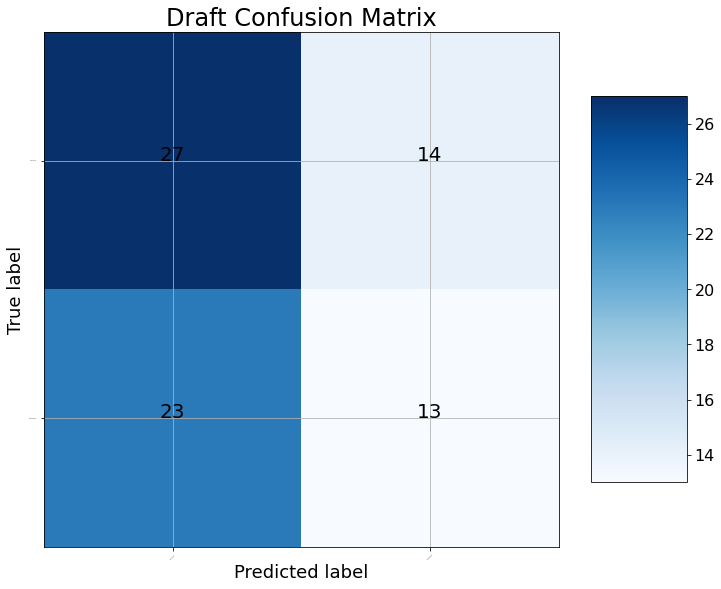

In [193]:
cm = confusion_matrix(test_labels, rf_predictions)
plot_confusion_matrix(cm, classes = ['Overachieved', 'Underachieved'],
                      title = 'Draft Confusion Matrix')